In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [2]:
df = pd.read_csv('uber.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.dropna(axis=0,inplace=True)
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [ ]:
#OUTLIERS

In [7]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) * 6371
    # long1,lati1,long2,lati2 = longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]
    # c = sqrt((long2 - long1) ** 2 + (lati2 - lati1) ** 2)asin 
       
    return c

In [8]:
df['Distance'] = distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['dropoff_latitude']
)

Text(0, 0.5, 'fare_amount')

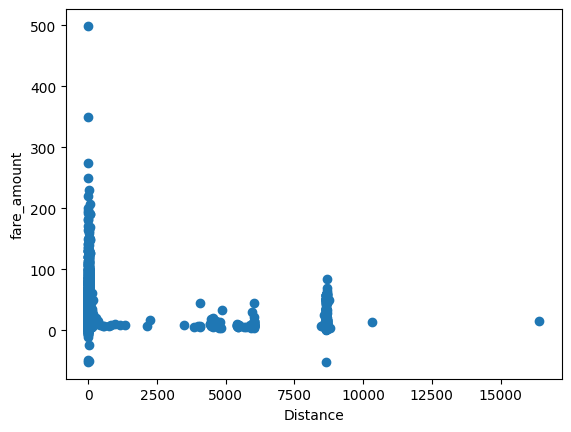

In [9]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

<Axes: >

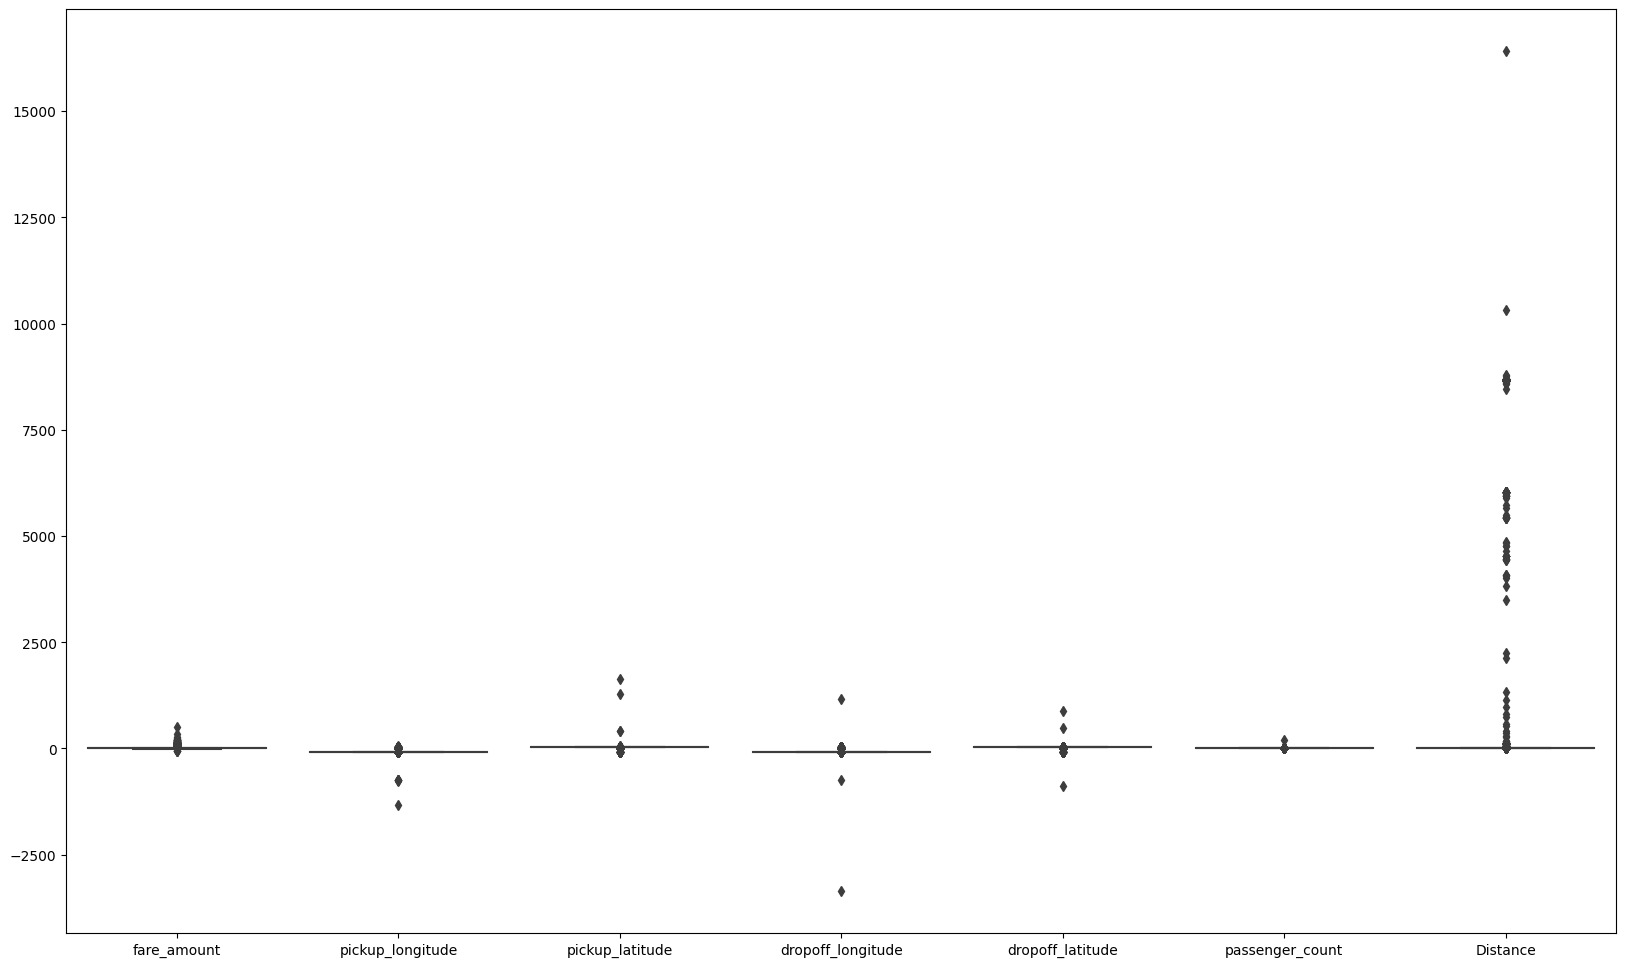

In [10]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df)

Text(0, 0.5, 'fare_amount')

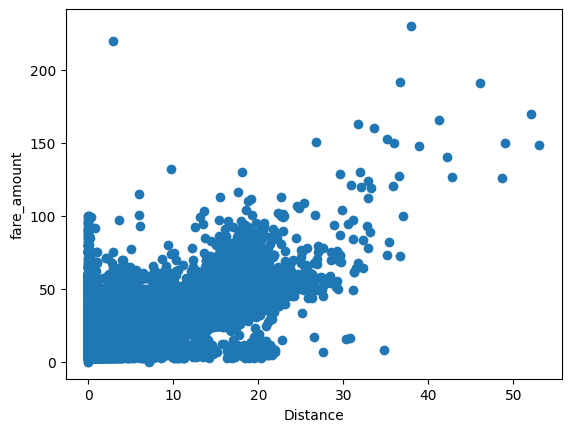

In [11]:
df.drop(df[df['Distance'] >= 60].index, inplace = True)
df.drop(df[df['fare_amount'] <= 0].index, inplace = True)

df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [12]:
#CORRELATION

In [13]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.125637,0.005885,-0.006253,0.005501,-0.006142,0.011693,0.857729
pickup_datetime,0.125637,1.000000,0.005589,-0.007984,0.005561,-0.008064,0.006460,0.030578
pickup_longitude,0.005885,0.005589,1.000000,-0.973204,0.999992,-0.981941,-0.000649,-0.117044
pickup_latitude,-0.006253,-0.007984,-0.973204,1.000000,-0.973206,0.991076,-0.001190,0.110843
dropoff_longitude,0.005501,0.005561,0.999992,-0.973206,1.000000,-0.981942,-0.000650,-0.117282
dropoff_latitude,-0.006142,-0.008064,-0.981941,0.991076,-0.981942,1.000000,-0.001035,0.109486
passenger_count,0.011693,0.006460,-0.000649,-0.001190,-0.000650,-0.001035,1.000000,0.007784
Distance,0.857729,0.030578,-0.117044,0.110843,-0.117282,0.109486,0.007784,1.000000


In [16]:
# Standardization
# SPLIT DATASET

SyntaxError: invalid syntax (1540977328.py, line 2)

In [19]:
X = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

[[-0.39820843]
 [-0.37738556]
 [ 0.1640092 ]
 ...
 [ 2.03806797]
 [ 0.3305922 ]
 [ 0.28894645]]
[[-0.43819769]
 [-0.22258873]
 [ 0.49552213]
 ...
 [ 2.67145829]
 [ 0.07874908]
 [ 0.60173174]]


In [20]:
# SIMPLE LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))



y_pred = l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result[['Predicted']] = y_pred

result.sample(10)

Training set score: 0.74
Test set score: 0.7340468


,Actual,Predicted
13015,-0.137922,-0.588484
6687,-0.002574,0.222050
28240,-0.627260,-0.435551
7673,0.413884,0.760295
6133,-0.627260,-0.526467
32175,-0.210803,0.046304
22583,-0.335740,-0.189810
38221,0.830341,1.272504
31563,-0.502323,-0.446010
10270,0.330592,-0.777099


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.26621298757938816
Mean Absolute % Error: 1.9830747633407737
Mean Squared Error: 0.2705243510778538
Root Mean Squared Error: 0.52011955460053
R Squared (R²): 0.8567653080822025


In [24]:
# RANDOM FOREST REGRESSOR

In [25]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

C:\Users\Atharv Kulkarni\AppData\Local\Temp\ipykernel_22700\2264728154.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [26]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
33053,-0.398208,-0.561668
12150,-0.460677,-0.353439
462,-0.585614,-0.473171
38325,-0.752197,-0.603938
31860,0.226478,-0.665991
32632,0.455529,0.810476
21732,-0.377386,-0.649332
23791,-0.189980,-0.282017
23581,-0.346151,-0.475253
35010,-0.377386,0.025121


In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('R Squared (R²):', np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error: 0.3077087698385678
Mean Absolute % Error: 2.161623761570947
Mean Squared Error: 0.33297733033643484
Root Mean Squared Error: 0.5770418791876677
R Squared (R²): 0.8201518783882692
